/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/public/home/lizw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/public/home/lizw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


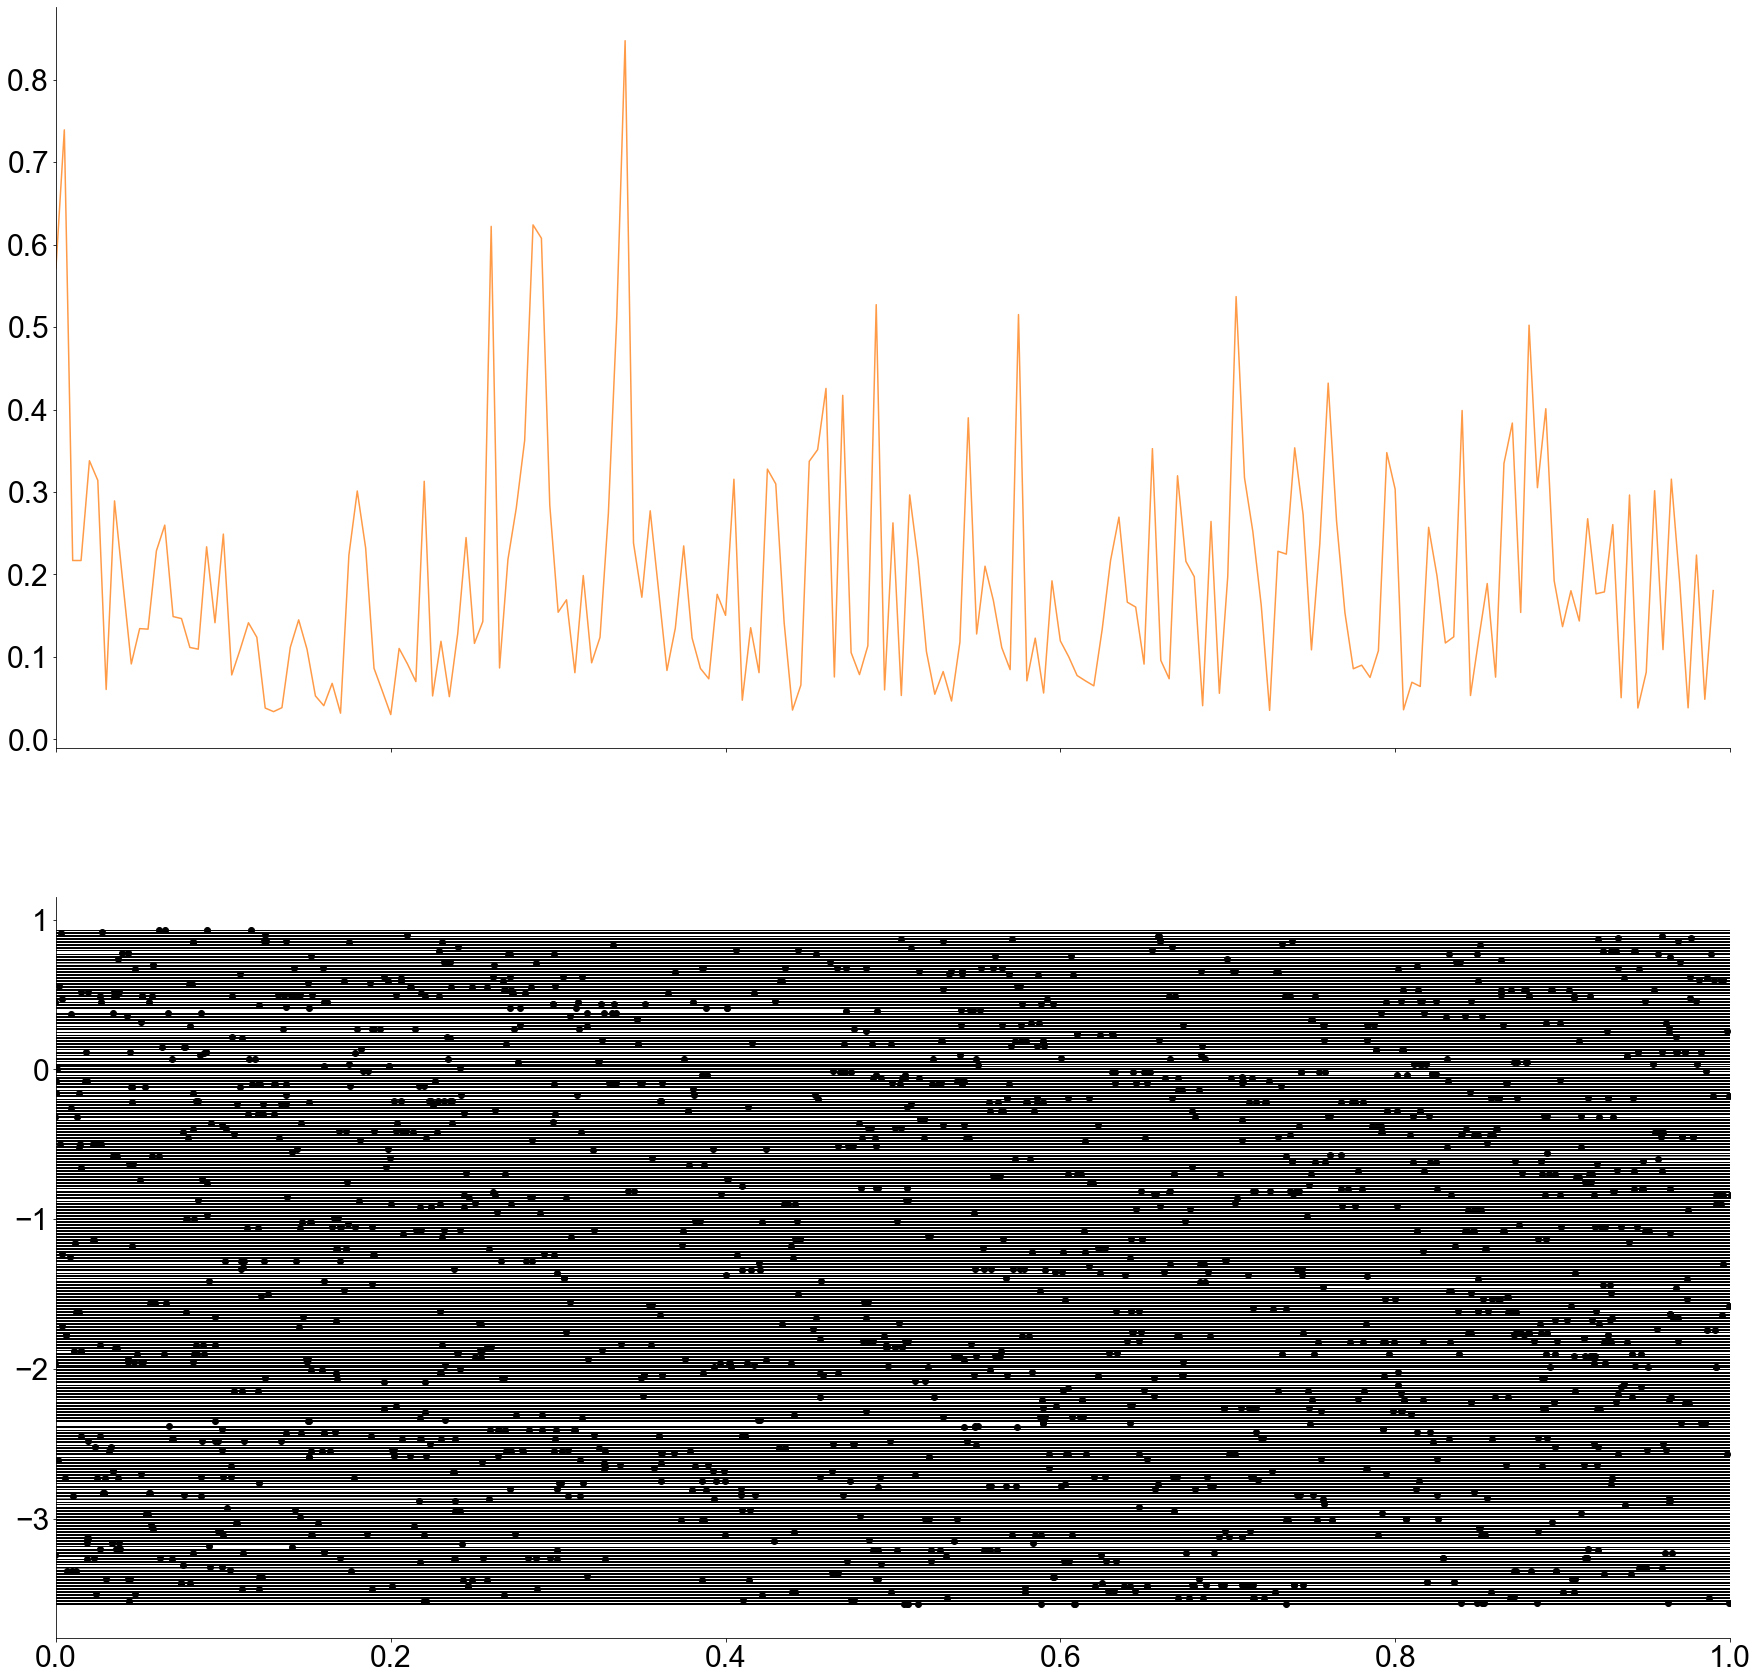

In [3]:
import pandas as pd
import numpy as np
Long_C_CG_10k = pd.read_csv('/public/home/lizw/task/pore_c/methylation/merge_CG_10000_level_size_detial.csv',converters={'chrom':str})
Long_C_CG_10k['start']  = [int(x[0][1:]) for x in Long_C_CG_10k['interval'].str.split(',')]
Long_C_CG_10k['end'] = [int(x[1][:-1]) for x in Long_C_CG_10k['interval'].str.split(',')]
all_related_read = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/met_example/DpnII_run08_region_5.and.MAPQ1_new_anchor_reads_all.csv')
read_info = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/DpnII_run08.read_info.csv')

order_20_set = set(read_info.query('order >= 20')['read_name'])
region1_read_set = set(all_related_read['read_name'])
read_selected = order_20_set&region1_read_set
read_draw = all_related_read.query('read_name in @read_selected')
region = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/met_example/region_5.bed',header=None,names=['chrom','start','end','name'])
region_chr = str(region.loc[0,'chrom'])
region_start = region.loc[0,'start']
region_end = region.loc[0,'end']

read_draw['pos_draw'] = (read_draw['pos'] - region_start)/(region_end-region_start)
region_met = Long_C_CG_10k.query('(chrom ==@region_chr) & (start >=@region_start) & (end <@region_end)')
region_met['start_draw']= (region_met['start']-region_start)/(region_end-region_start)

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
import seaborn as sns
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,30),sharex=True)
region_met.plot(kind='line',x='start_draw',y='met_level',ax=ax[0],legend=False,color = '#FF9A47')

ax[1].set_xlim(0,1)
top = 0.93
for frag_i,frag_df in read_draw.groupby('read_name'):
    frag_df_len = len(frag_df)
    frag_df_y = np.zeros(frag_df_len)+top
    ax[1].plot(frag_df['pos_draw'],frag_df_y,'o-',color='k',lw=0.5)
    top -= 0.01
sns.despine(ax=ax[0])
sns.despine(ax=ax[1])
plt.savefig('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/met_example/example_region_5.png',format='png',dpi=300,bbox_inches='tight')

In [4]:
read_draw

,Unnamed: 0,index,chrom,read_name,pos,anchor_name,pos_draw
5124,5124,169424,5,eb6729d7-d893-420f-994c-8f311d4021c1,224118,normal,-4.387941
5125,5125,169425,1,eb6729d7-d893-420f-994c-8f311d4021c1,9052173,region_5,0.026086
5126,5126,169426,1,eb6729d7-d893-420f-994c-8f311d4021c1,9076340,region_5,0.038170
5127,5127,169427,1,eb6729d7-d893-420f-994c-8f311d4021c1,740244,normal,-4.129878
5128,5128,169428,1,eb6729d7-d893-420f-994c-8f311d4021c1,9071897,region_5,0.035949
...,...,...,...,...,...,...,...
1038524,1038524,36360043,1,0cb9b351-16f7-45d1-b49b-e9fad21d61fb,8879738,normal,-0.060131
1038525,1038525,36360044,1,0cb9b351-16f7-45d1-b49b-e9fad21d61fb,5891116,normal,-1.554442
1038526,1038526,36360045,1,0cb9b351-16f7-45d1-b49b-e9fad21d61fb,9318526,region_5,0.159263
1038527,1038527,36360046,1,0cb9b351-16f7-45d1-b49b-e9fad21d61fb,2391237,normal,-3.304381
